In [3]:
#todo
#cleaner: get rid of transpositions in generating initial centers
#define centers as just a sample from a distribution? (covmat?)

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random

In [5]:
data = np.loadtxt('cluster.dat').T
mean = np.mean(data,axis=0).reshape(1,2)
std = np.std(data,axis=0).reshape(1,2)

max_iters = 5
num_clusters = 8

In [9]:
def dist(a,b):
    return np.sum((a-b)**2)

def error(centers, points):
    error = 0
    for p in points:
        error += dist(p[:2], centers[int(p[2])])
    error = error / (2*points.shape[0])
    return error

def initial_centers(num_clusters, seed):
    #returns initial cluster centers around the mean 
    #(by sampling from a uniform distribution 
    #centered around the mean and limited by half of the standard deviation)
    means = np.repeat(mean,num_clusters,axis=0)
    stds = np.repeat(std,num_clusters,axis=0)
    rand_multipliers = np.random.RandomState(seed).uniform(low=-1, high=1, size=[num_clusters,2])
    centers = means+(rand_multipliers*stds*0.5)
    return centers

def batch_iteration(centers, points):
    distances = np.zeros([centers.shape[0],1])
    for p in points: #assign the closest cluster center to each point
        for i, c in enumerate(centers): #calculate distance to each center
            distances[i] = dist(p[:2],c)
        p[2] = np.argmin(distances) 
        
    #calculate new position of each cluster center
    #each point contributes to x, y 
    centers = np.zeros([centers.shape[0], centers.shape[1]+1])
    for p in points: 
        c_index = int(p[2])
        centers[c_index,0] += p[0]
        centers[c_index,1] += p[1]
        centers[c_index,2] += 1.0
        
    for c in centers:
        if c[2] != 0:
            c[0] = c[0]/c[2]
            c[1] = c[1]/c[2]
    return centers[:,:2], points

def plot_iteration(centers, ax):
    ax.scatter(data[:,0],data[:,1])
    ax.scatter(centers[:,0],centers[:,1],color="yellow",s=60)
    
def plot_error(num_iterations, errors, ax):
    ax.plot(np.arange(num_iterations), errors)
    ax.scatter(np.arange(num_iterations), errors)
    ax.set_ylim([0,2])
    ax.set_xlim([0,num_iterations-1])
    ax.set_title("Error by iteration", fontsize=18)

    
def kmeans(num_clusters, num_iterations = 5):
    seeds = [0,1,2]
    
    fig, ax = plt.subplots(num_iterations+1,len(seeds), figsize=[20,4*num_iterations])
    fig.suptitle("Batch kMeans: {:>1} cluster centers, 3 different random initial positions".format(num_clusters), fontsize = 24)
    
    for j, seed in enumerate(seeds):
        #random initial cluster centers around the mean of the data
        centers = initial_centers(num_clusters, seed)
        
        #append a column of zeros to the original data. 
        #(it will hold the indices of a given point's current cluster)
        points = np.concatenate([data, np.zeros([data.shape[0],1])], axis=1)
        errors = np.zeros(num_iterations)   

        for i in np.arange(num_iterations):
            plot_iteration(centers, ax[i,j])
            errors[i] = error(centers, points)
            centers, points = batch_iteration(centers, points)

        plot_error(num_iterations, errors, ax[num_iterations,j])


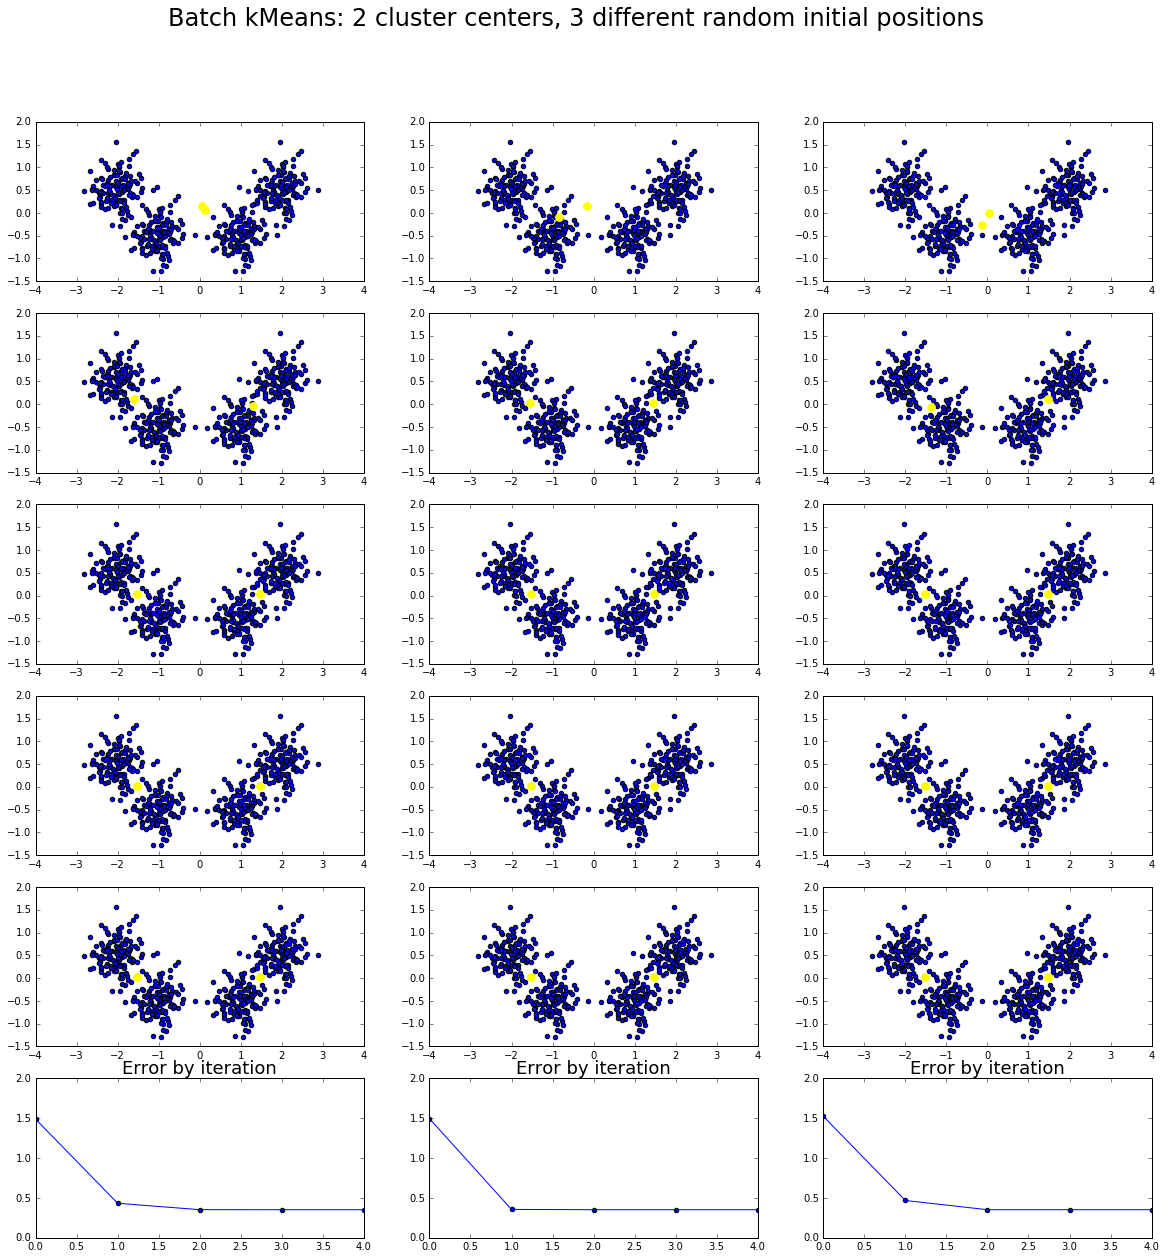

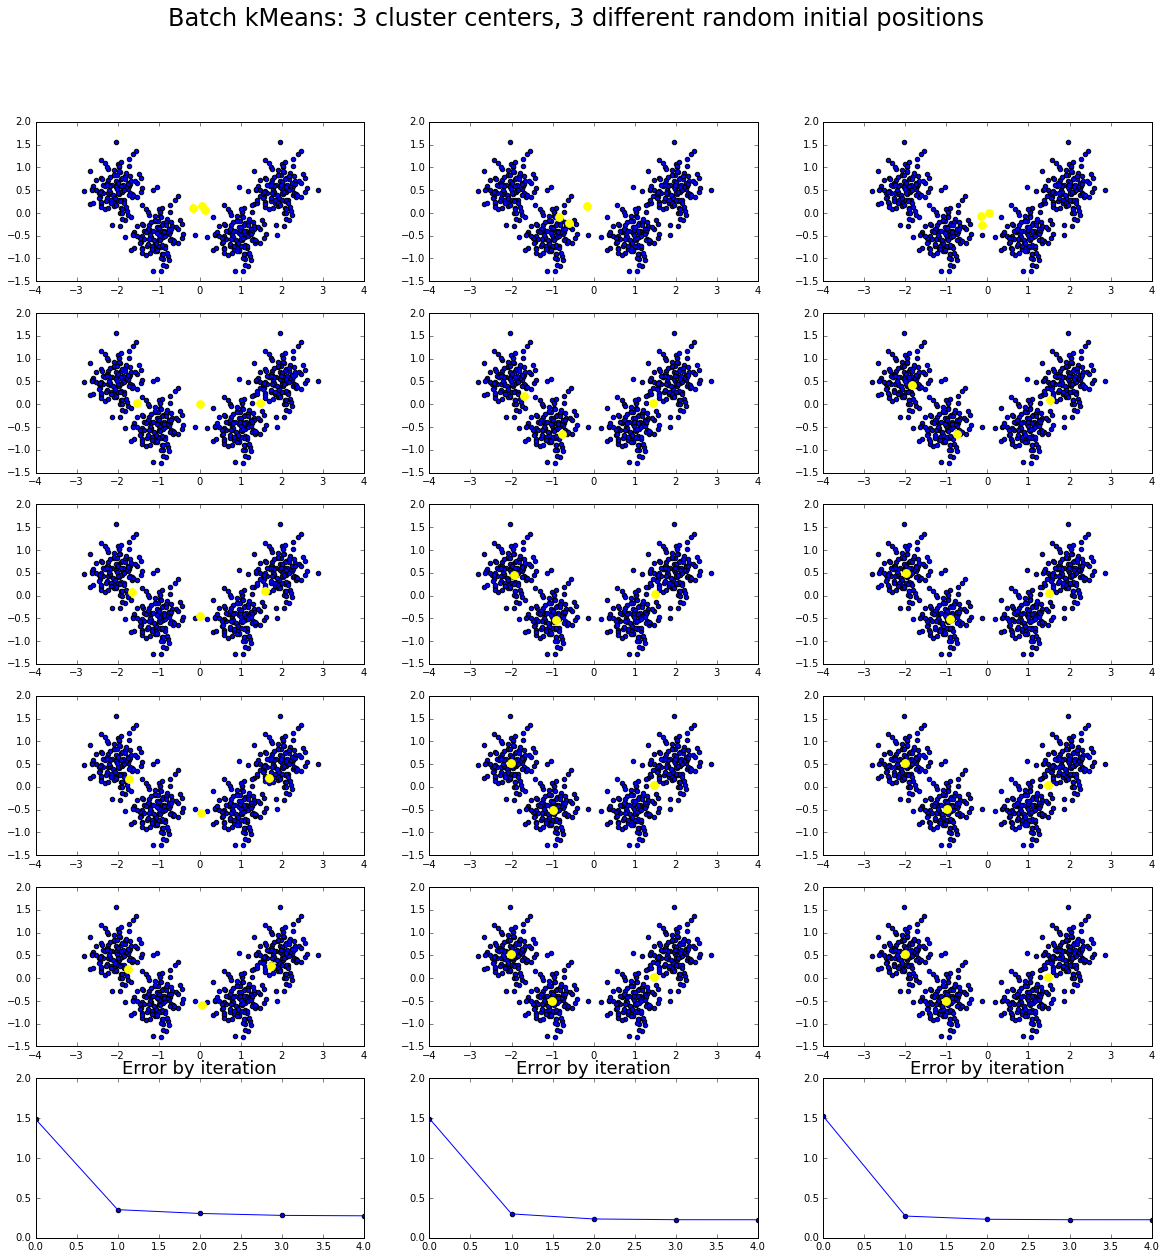

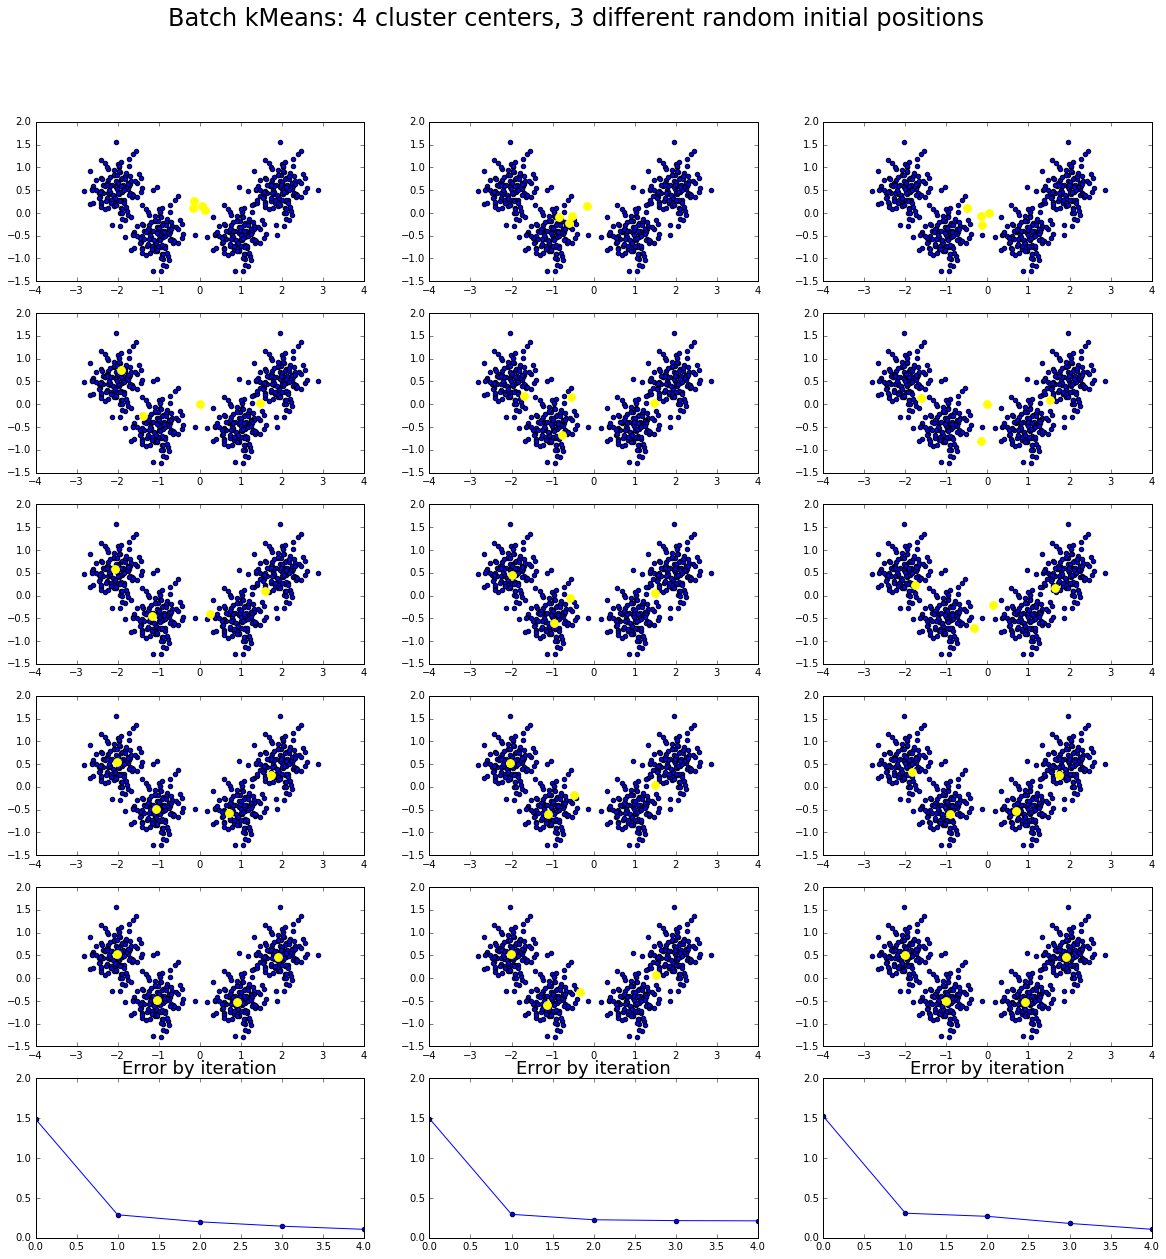

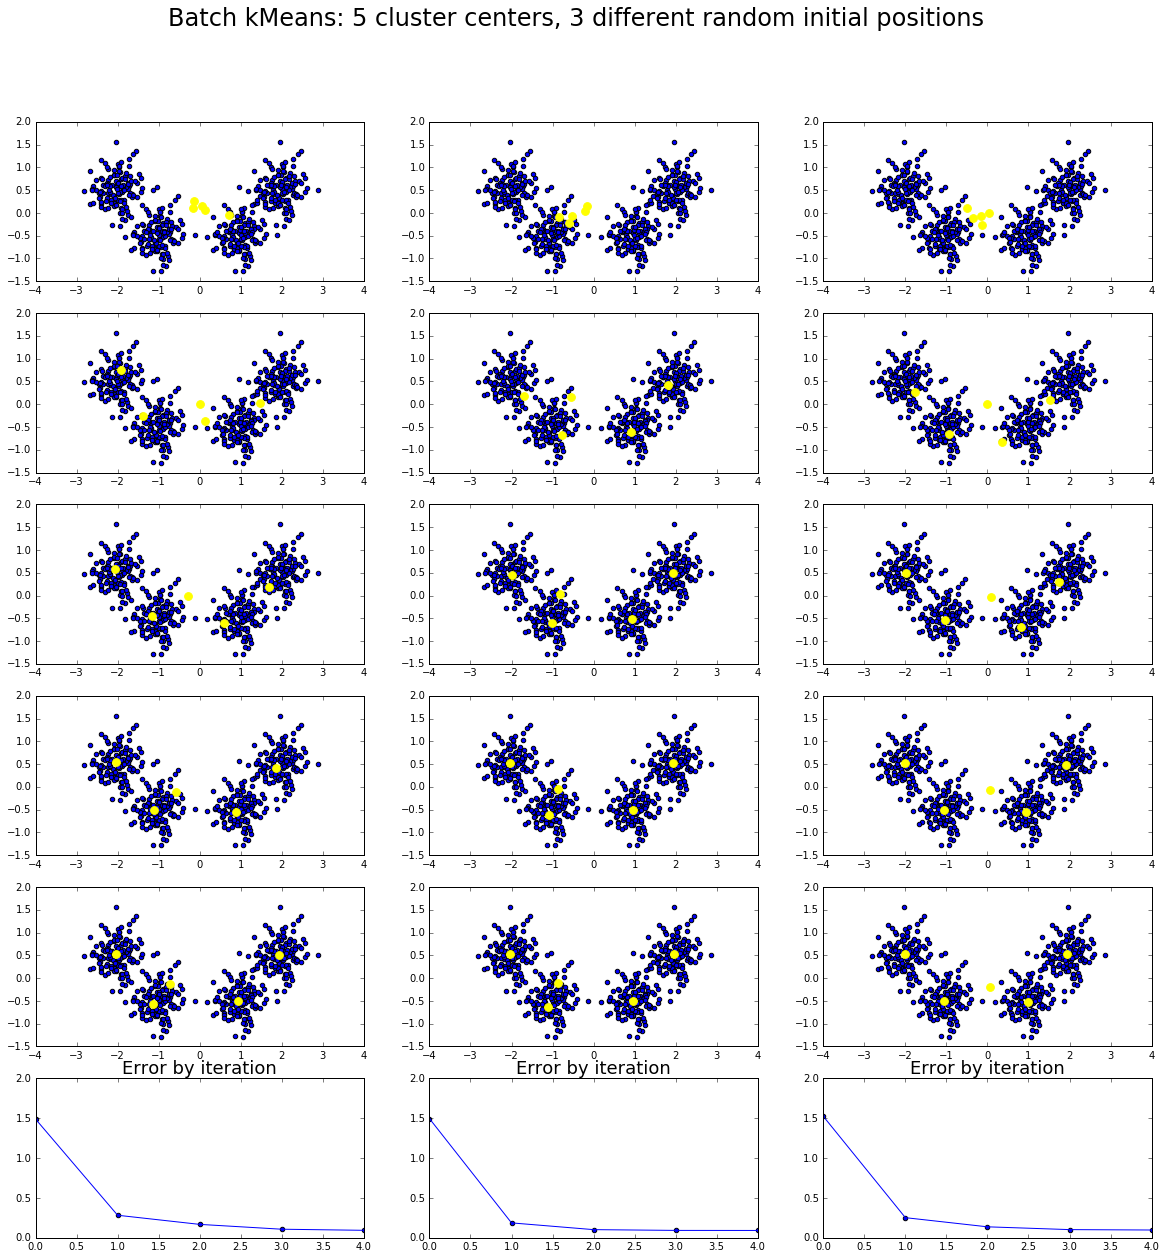

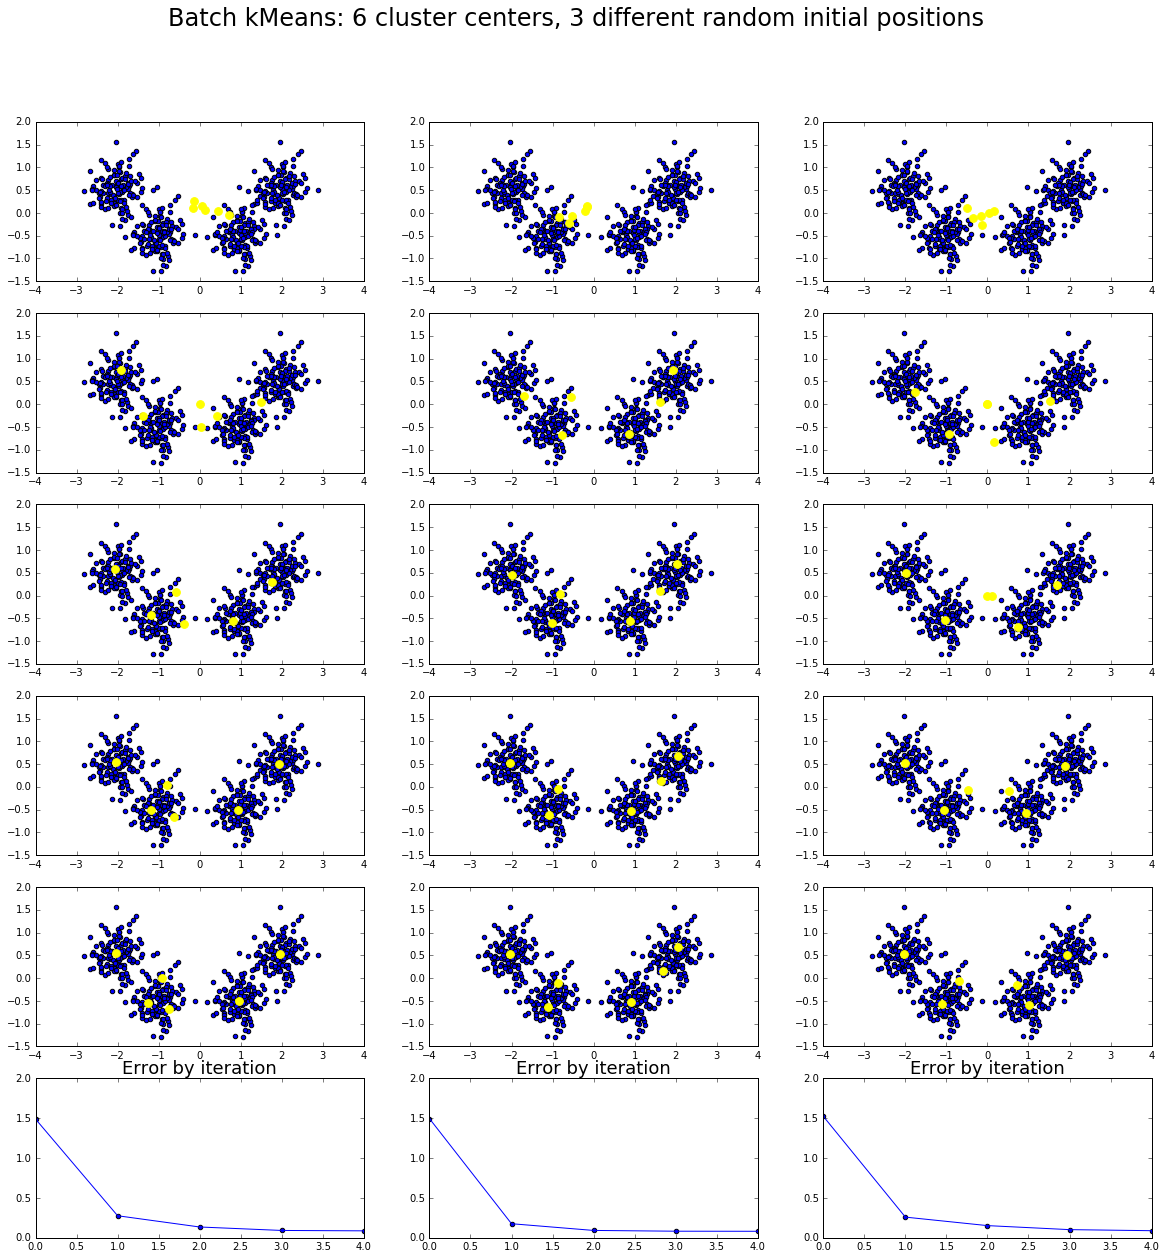

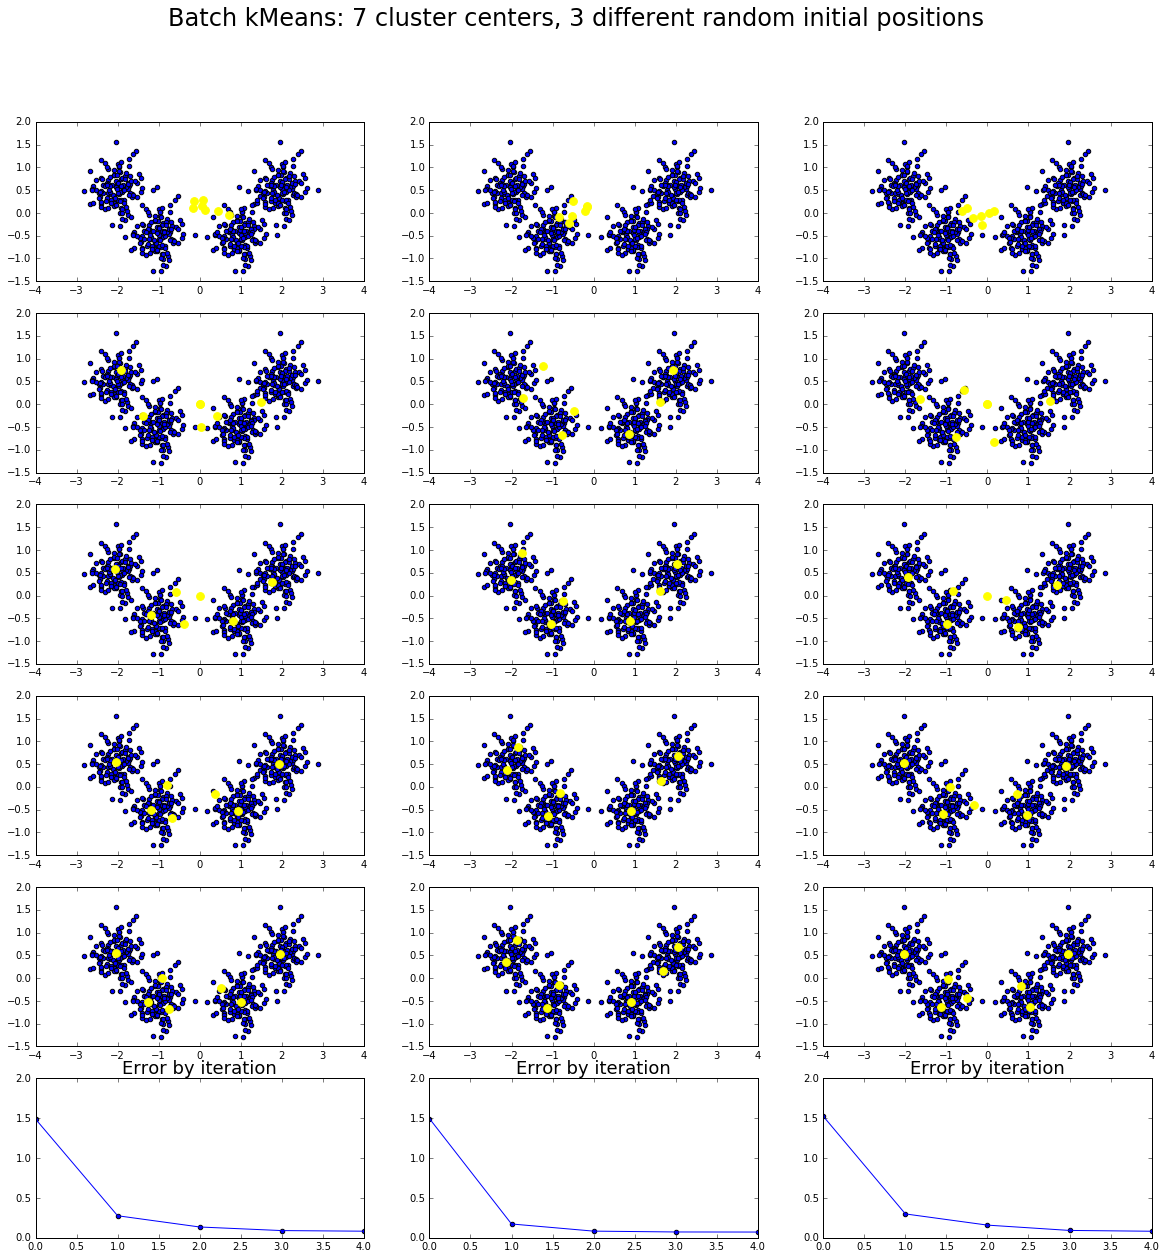

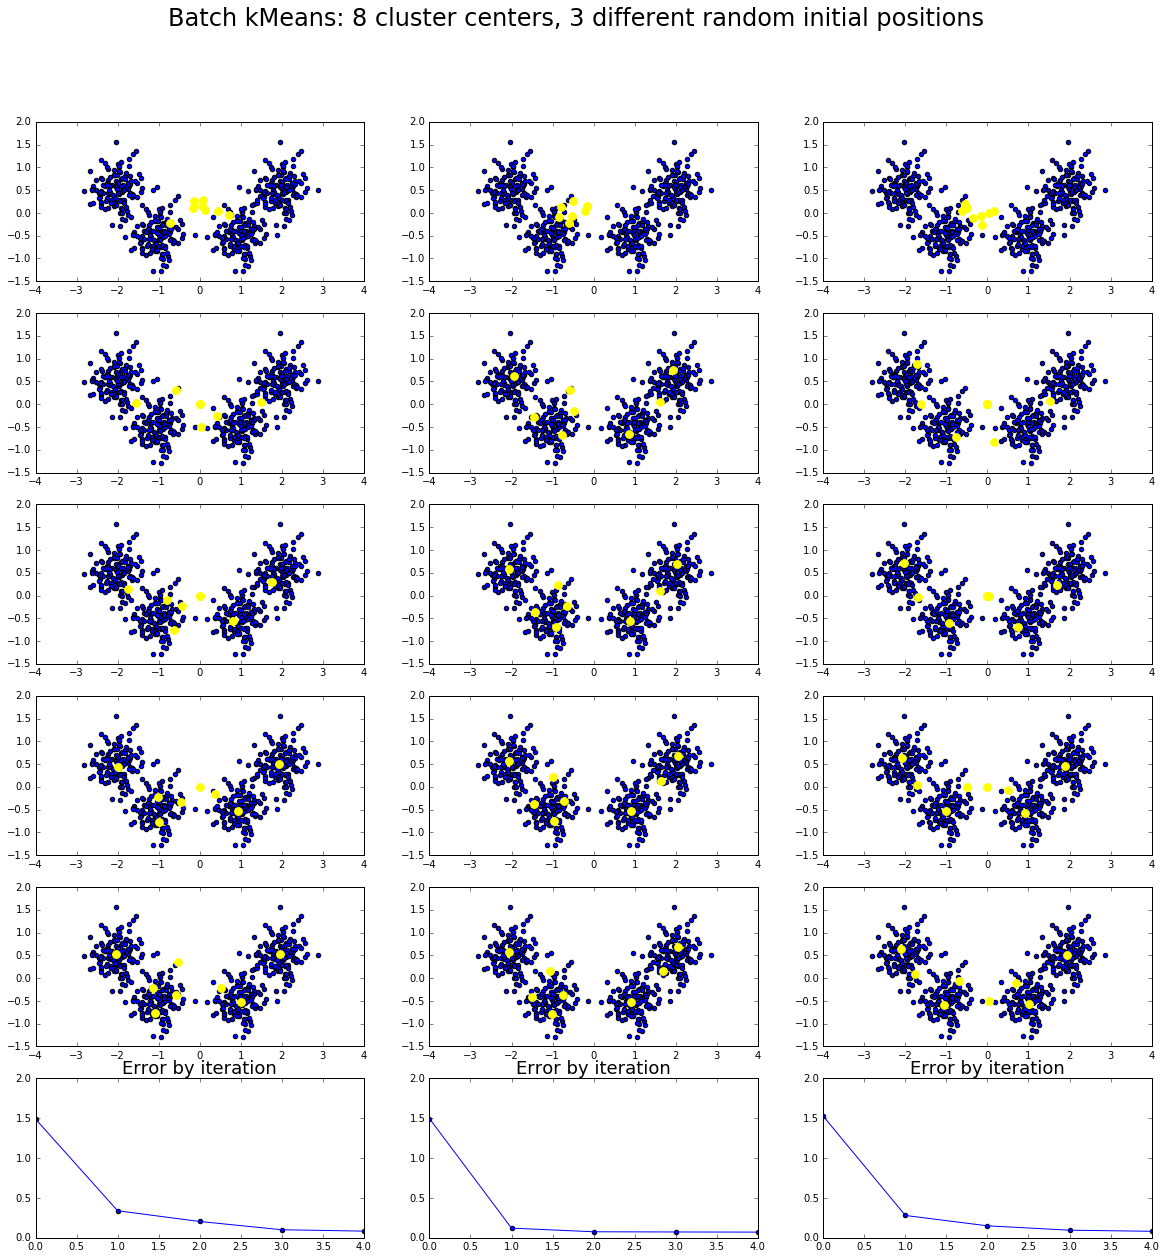

In [11]:
for k in [2,3,4,5,6,7,8]:
    kmeans(num_clusters=k)